# Fake News Dedect
## Author: Eren ERIS

Dataset : https://www.kaggle.com/datasets/bhavikjikadara/fake-news-detection?select=true.csv

Description : 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk 
from nltk.stem.porter import PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA 

import warnings
warnings.filterwarnings('ignore')

from sklearn.svm import SVC
s=SVC()

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [2]:
fake = pd.read_csv("/kaggle/input/fake-news-detection/fake.csv")
fake["label"] = 0
fake.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [3]:
true = pd.read_csv("/kaggle/input/fake-news-detection/true.csv")
true["label"] = 1
true.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [4]:
df = pd.concat([fake, true], ignore_index=True)
df = df.sample(frac=1).reset_index(drop=True)

In [5]:
df.head()

,title,text,subject,date,label
0,"When #BlackLivesMatter, Golf Take Priority Ove...",There aren t too many stories that are more sh...,politics,"Aug 25, 2016",0
1,WATCH HILLARY SQUIRM When Mainstream Media Ask...,Hillary was too busy to be bothered with makin...,politics,"Jan 17, 2016",0
2,Planned meeting of TPP leaders at APEC summit ...,"DANANG, Vietnam (Reuters) - A planned meeting ...",worldnews,"November 10, 2017",1
3,U.S. weighs calling Myanmar's Rohingya crisis ...,WASHINGTON (Reuters) - The State Department is...,politicsNews,"October 24, 2017",1
4,"China grants economic aid to Djibouti, site of...",BEIJING (Reuters) - China on Thursday offered ...,worldnews,"November 23, 2017",1


In [6]:
df.shape,fake.shape,true.shape

((44898, 5), (23481, 5), (21417, 5))

In [7]:
df.duplicated().sum()#Tekrarlayan Verileri Temizleme

209

In [8]:
df.drop_duplicates(inplace=True)

<Axes: xlabel='label', ylabel='count'>

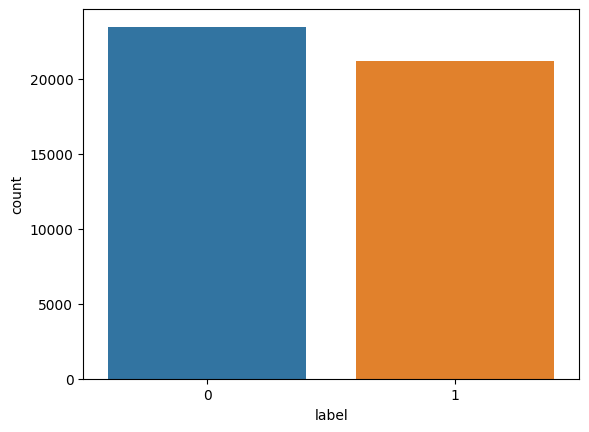

In [9]:
sns.countplot(x=df['label'])

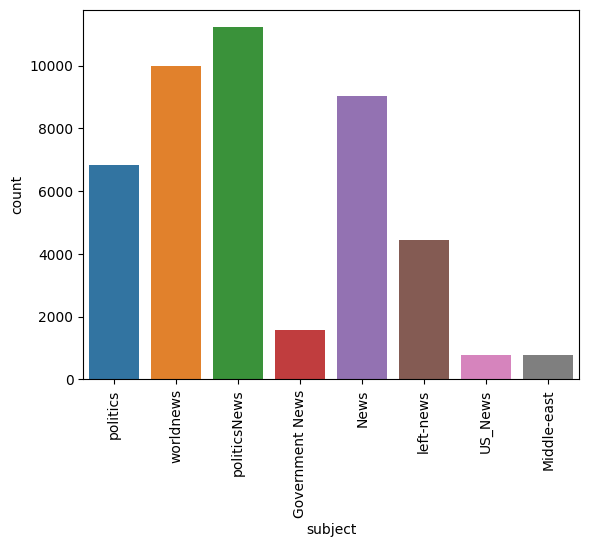

In [10]:
sns.countplot(x=df['subject'])
# X ekseni etiketlerini ters çevirme
plt.xticks(rotation=90)
# Grafiği gösterme
plt.show()

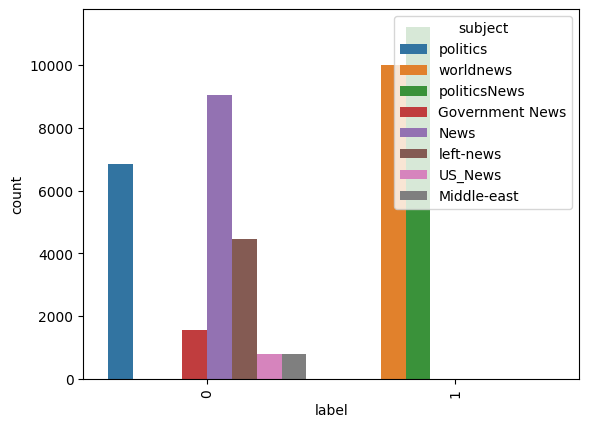

In [11]:
sns.countplot(x=df['label'],hue=df['subject'])
# X ekseni etiketlerini ters çevirme
plt.xticks(rotation=90)
# Grafiği gösterme
plt.show()

In [12]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
df['text']=df['text'].str.lower()
df['text']=df['text'].str.replace('[^\w\s]','') # noktalama isaretlerini kaldir
df['text']=df['text'].str.replace('\d+','') #rakamlari kaldir
df['text']=df['text'].str.replace('\r','').replace('\n','')

In [14]:
# General transformation in the text
def preprocessing(mc):
    
    mc = mc.replace("\n"," ").replace("\t"," ")
    mc = mc.lower()
    mc = re.sub('@[^\s]+', '', mc)
    mc = re.sub(r'\B#\S+', '', mc)
    mc = re.sub(r"http\S+", "", mc)
    mc = ' '.join(re.findall(r'\w+', mc))
    mc = re.sub(r'\s+[b-zA-Z]\s+', ' ', mc)
    mc = re.sub(r'\s+', ' ', mc, flags=re.I)
    

    return mc

In [15]:
# Import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Create CountVectorizer object
tdf_vectorizer = TfidfVectorizer(ngram_range=(1,3),stop_words='english',max_features=10000)

# Generate matrix of word vectors
tdf_vec = tdf_vectorizer.fit_transform(df['text'])

# Print the shape of bo
tdf_vec.shape


(44689, 10000)

In [16]:
tdf_df = pd.DataFrame(tdf_vec.toarray(), columns=tdf_vectorizer.get_feature_names_out(), index=df.index)

In [17]:
y = df['label']
df = df.drop("label",axis=1)

In [18]:
merged = pd.concat([df,tdf_df],axis=1)
merged.head()

,title,text,subject,date,00,00 pm,000,000 people,000 rohingya,000 year,...,zero,zika,zika virus,zimbabwe,zinke,zone,zones,zor,zuckerberg,zuma
0,"When #BlackLivesMatter, Golf Take Priority Ove...",there aren t too many stories that are more sh...,politics,"Aug 25, 2016",0.0,0.0,0.00000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
1,WATCH HILLARY SQUIRM When Mainstream Media Ask...,hillary was too busy to be bothered with makin...,politics,"Jan 17, 2016",0.0,0.0,0.00000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
2,Planned meeting of TPP leaders at APEC summit ...,"danang, vietnam (reuters) - a planned meeting ...",worldnews,"November 10, 2017",0.0,0.0,0.00000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
3,U.S. weighs calling Myanmar's Rohingya crisis ...,washington (reuters) - the state department is...,politicsNews,"October 24, 2017",0.0,0.0,0.02363,0.0,0.050653,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
4,"China grants economic aid to Djibouti, site of...",beijing (reuters) - china on thursday offered ...,worldnews,"November 23, 2017",0.0,0.0,0.00000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.05738,0.0,0.0,0.0,0.0


In [19]:
merged = merged.rename(columns={'politics': 'new_politics'})
merged = merged.loc[:, ~merged.columns.duplicated(keep='last')]

In [20]:
X = merged.drop(["title","text"],axis=1)

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,shuffle=True,random_state=42,test_size=0.3,stratify=y)

In [22]:
from sklearn.metrics import accuracy_score,log_loss
from lightgbm import LGBMClassifier


lgr = LGBMClassifier()

lgr.fit(X_train,y_train)

y_pred = lgr.predict(X_test)
y_pred_prob = lgr.predict_proba(X_test)

score =accuracy_score(y_test,y_pred)
loss = log_loss(y_test,y_pred_prob)

print("Accuracy score of LGR model is ",score)
print("Log Loss of LGR model is ",loss)

Accuracy score of LGR model is  0.9979861266502573
Log Loss of LGR model is  0.01185067837605791


<Axes: >

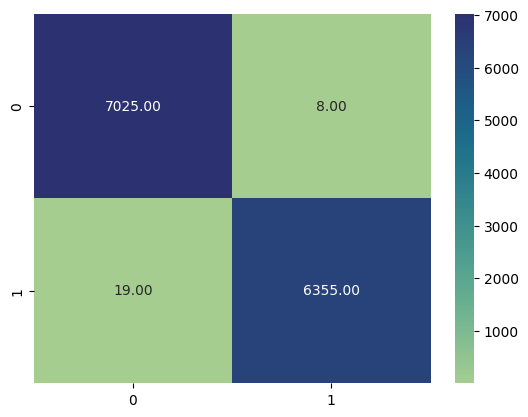

In [29]:
from sklearn import metrics
sns.heatmap(confusion_matrix(y_pred,y_test),annot=True,fmt='.2f',cmap="crest")